In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import seaborn as sns
from scipy.signal import savgol_filter, find_peaks
from scipy.integrate import cumulative_trapezoid

In [13]:
ex = pd.read_csv('excitation.csv', delimiter=',', nrows=151)
ex['i'] = ex['i']/np.max(ex['i'])

In [14]:
fl = pd.read_csv('10_fl.csv', delimiter=',')
del fl['Unnamed: 2']
fl['i'] = fl['i']/np.max(fl['i'])

In [15]:
tr = pd.read_csv('10_tr.csv', delimiter=';', decimal=',', nrows=301)
del tr['Unnamed: 4']
tr['i'] = tr['i']/np.max(tr['i'])

In [16]:
#convert wavelengths to wavenumber
for x in [ex, tr, fl]:
    x['w'] = (x['w'] * 10**(-7))**(-1) # nm -> cm -> cm^-1
for x in [ex, tr, fl]:
    x['i'] = savgol_filter(x['i'], 13, 9)

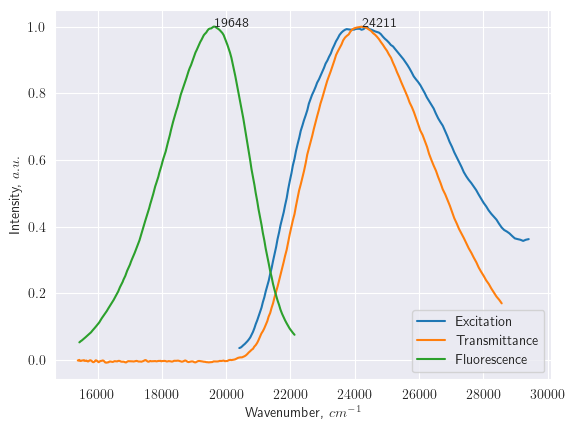

In [33]:
sns.set_style('darkgrid')

peaks_tr, _ = find_peaks(tr['i'], height=0.8)
for peak in peaks_tr:
    plt.annotate(f'{tr['w'][peak]:.0f}', xy=(tr['w'][peak], tr['i'][peak]))
peaks_fl, _ = find_peaks(fl['i'], height=0.8)
for peak in peaks_fl:
    plt.annotate(f'{fl['w'][peak]:.0f}', xy=(fl['w'][peak], fl['i'][peak]))


plt.plot(ex['w'], ex['i'], label='Excitation')
plt.plot(tr['w'], tr['i'], label='Transmittance')
plt.plot(fl['w'], fl['i'], label='Fluorescence')
plt.xlabel(r'Wavenumber, $cm^{-1}$')
plt.ylabel(r'Intensity, $a.u.$')
plt.legend()
plt.savefig('formaldehyde.svg', dpi=700)
#plt.plot(fl['w1'], fl['abs1'])

## Нахождение квантового выхода